In [3]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [7]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 27kB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
     |████████████████████████████████| 450kB 50.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X,train_y),(test_X,test_y)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_X=train_X/255.0
test_X=test_X/255.0

In [6]:
train_X.shape

(60000, 28, 28)

In [0]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)

In [19]:
train_X[0].shape

(28, 28, 1)

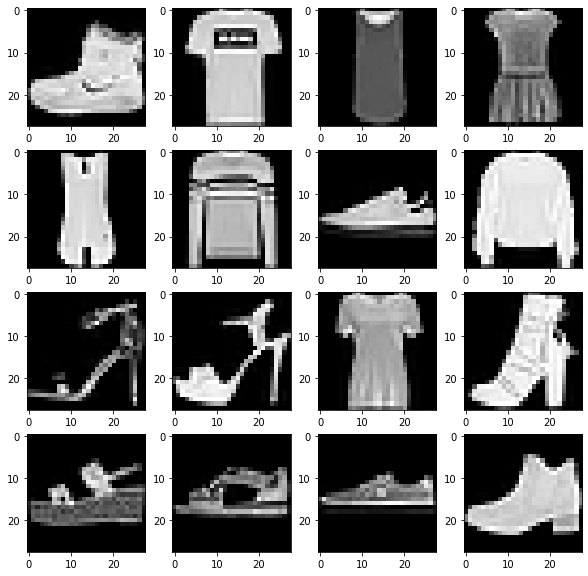

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for c in range(16):
  plt.subplot(4,4,c+1)
  plt.imshow(train_X[c].reshape(28,28),cmap='gray')

plt.show()
print(train_y[:16])

In [36]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=16),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer= tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_6 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               3965056   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

In [37]:
history = model.fit(train_X,train_y, epochs=25,validation_split=0.25,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)])

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 8s 184us/sample - loss: 0.4643 - accuracy: 0.8332 - val_loss: 0.3843 - val_accuracy: 0.8609
Epoch 2/25
45000/45000 [==============================] - 8s 175us/sample - loss: 0.3387 - accuracy: 0.8773 - val_loss: 0.3718 - val_accuracy: 0.8615
Epoch 3/25
45000/45000 [==============================] - 8s 177us/sample - loss: 0.2836 - accuracy: 0.8963 - val_loss: 0.3908 - val_accuracy: 0.8640
Epoch 4/25
45000/45000 [==============================] - 8s 178us/sample - loss: 0.2414 - accuracy: 0.9107 - val_loss: 0.3980 - val_accuracy: 0.8702
Epoch 5/25
45000/45000 [==============================] - 8s 175us/sample - loss: 0.2081 - accuracy: 0.9233 - val_loss: 0.4152 - val_accuracy: 0.8722
Epoch 6/25
45000/45000 [==============================] - 8s 182us/sample - loss: 0.1816 - accuracy: 0.9336 - val_loss: 0.4422 - val_accuracy: 0.8707
Epoch 7/25
45000/45000 [==========================

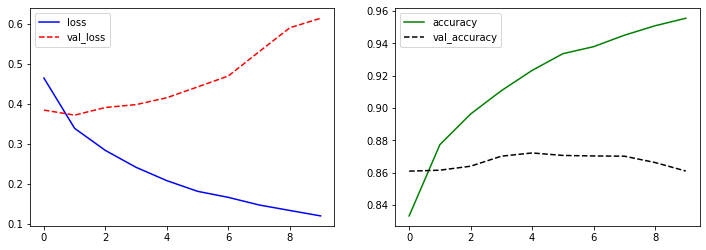

In [38]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.legend()

In [39]:
model.evaluate(test_X,test_y)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.6301 - accuracy: 0.8617


[0.6301277225971222, 0.8617]

In [41]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32),
                             tf.keras.layers.MaxPool2D(strides=(2,2)),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
                             tf.keras.layers.MaxPool2D(strides=(2,2)),
                             tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=128, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.3),
                             tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer= tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 7s 162us/sample - loss: 0.5066 - accuracy: 0.8167 - val_loss: 0.3516 - val_accuracy: 0.8697
Epoch 2/25
45000/45000 [==============================] - 7s 146us/sample - loss: 0.3486 - accuracy: 0.8756 - val_loss: 0.3067 - val_accuracy: 0.8851
Epoch 3/25
45000/45000 [==============================] - 7s 153us/sample - loss: 0.3121 - accuracy: 0.8863 - val_loss: 0.3048 - val_accuracy: 0.8909
Epoch 4/25
45000/45000 [==============================] - 7s 149us/sample - loss: 0.2865 - accuracy: 0.8972 - val_loss: 0.3253 - val_accuracy: 0.8813
Epoch 5/25
45000/45000 [==============================] - 7s 152us/sample - loss: 0.2651 - accuracy: 0.9037 - val_loss: 0.2902 - val_accuracy: 0.8940
Epoch 6/25
45000/45000 [==============================] - 7s 147us/sample - loss: 0.2487 - accuracy: 0.9083 - val_loss: 0.3042 - val_accuracy: 0.8947
Epoch 7/25
45000/45000 [==========================

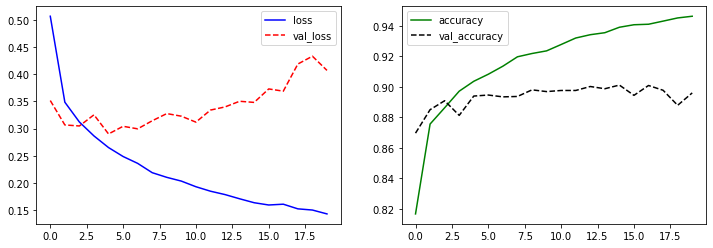

In [42]:
history = model.fit(train_X,train_y, epochs=25,validation_split=0.25,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)])

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.legend()

print(model.evaluate(test_X,test_y))

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

In [9]:
history = model.fit(train_X,train_y, epochs=25,validation_split=0.25,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)])

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.legend()

print(model.evaluate(test_X,test_y))

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 23s 501us/sample - loss: 0.5830 - accuracy: 0.7893 - val_loss: 0.3152 - val_accuracy: 0.8811
Epoch 2/25
45000/45000 [==============================] - 16s 359us/sample - loss: 0.3662 - accuracy: 0.8687 - val_loss: 0.2783 - val_accuracy: 0.8985
Epoch 3/25
45000/45000 [==============================] - 16s 352us/sample - loss: 0.3256 - accuracy: 0.8864 - val_loss: 0.2738 - val_accuracy: 0.8993
Epoch 4/25
45000/45000 [==============================] - 16s 352us/sample - loss: 0.2999 - accuracy: 0.8935 - val_loss: 0.2513 - val_accuracy: 0.9051
Epoch 5/25
45000/45000 [==============================] - 16s 353us/sample - loss: 0.2885 - accuracy: 0.8961 - val_loss: 0.2336 - val_accuracy: 0.9105
Epoch 6/25
45000/45000 [==============================] - 16s 352us/sample - loss: 0.2766 - accuracy: 0.9006 - val_loss: 0.2349 - val_accuracy: 0.9138
Epoch 7/25
45000/45000 [====================

NameError: ignored

10000/10000 [==============================] - 1s 133us/sample - loss: 0.2290 - accuracy: 0.9158
[0.2289829005599022, 0.9158]


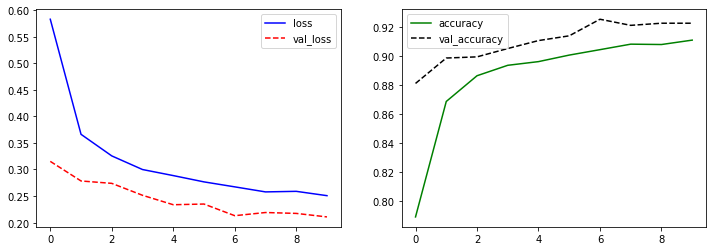

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.legend()

print(model.evaluate(test_X,test_y))

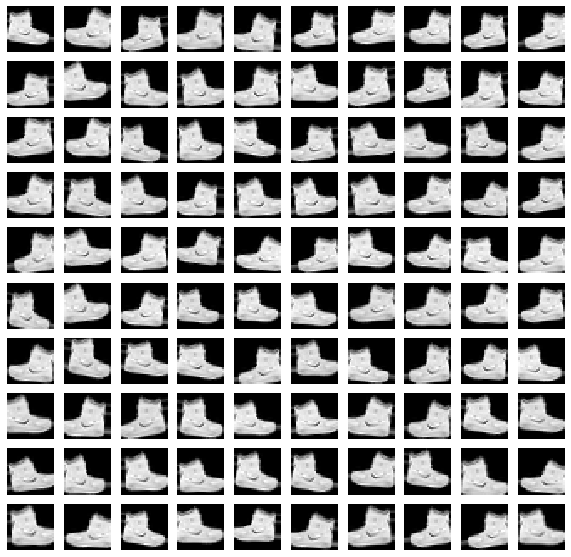

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    shear_range=0.5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size=100

x_augmented=image_generator.flow(np.tile(train_X[0].reshape(28*28),100).reshape(-1,28,28,1),np.zeros(augment_size),batch_size=augment_size,shuffle=False).next()[0]

plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [15]:
np.zeros(augment_size)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [42]:
np.tile(np.zeros((2,4)),4)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [23]:
# 6.15 Image Augmentation
image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.10,
            shear_range=0.5,
            width_shift_range=0.10,
            height_shift_range=0.10,
            horizontal_flip=True,
            vertical_flip=False)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


In [27]:
train_X.shape

(90000, 28, 28, 1)

In [0]:
x=image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False)

Train on 67500 samples, validate on 22500 samples
Epoch 1/25
67500/67500 [==============================] - 24s 361us/sample - loss: 0.5824 - accuracy: 0.7867 - val_loss: 0.5657 - val_accuracy: 0.7841
Epoch 2/25
67500/67500 [==============================] - 24s 350us/sample - loss: 0.3904 - accuracy: 0.8597 - val_loss: 0.5355 - val_accuracy: 0.7950
Epoch 3/25
67500/67500 [==============================] - 24s 351us/sample - loss: 0.3446 - accuracy: 0.8759 - val_loss: 0.4673 - val_accuracy: 0.8287
Epoch 4/25
67500/67500 [==============================] - 24s 350us/sample - loss: 0.3231 - accuracy: 0.8837 - val_loss: 0.4511 - val_accuracy: 0.8295
Epoch 5/25
67500/67500 [==============================] - 24s 355us/sample - loss: 0.3089 - accuracy: 0.8883 - val_loss: 0.4473 - val_accuracy: 0.8289
Epoch 6/25
67500/67500 [==============================] - 24s 352us/sample - loss: 0.2988 - accuracy: 0.8924 - val_loss: 0.4162 - val_accuracy: 0.8454
Epoch 7/25
67500/67500 [====================

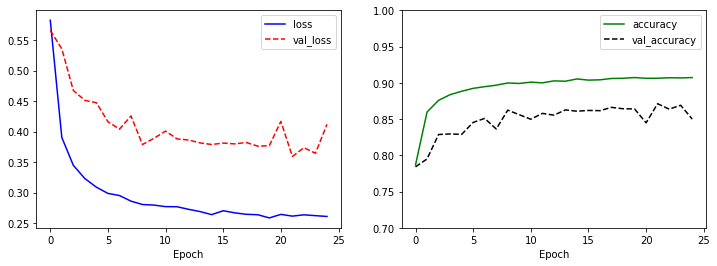

NameError: ignored

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [0]:
g